In [1]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.0/973.0 kB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127

In [2]:
from roboflow import Roboflow
rf = Roboflow(api_key="NwOq8YGFjNY57lbPrwBo")
project = rf.workspace("ahsan-h6w1d").project("student-behaviour-detection-neazg-pcpzy")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Student-Behaviour-Detection-3 in yolov8:: 100%|██████████| 7740/7740 [00:03<00:00, 2481.40it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# train on the 6K

In [3]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")  # Using the small model for higher accuracy
dataset_location = "/content/Student-Behaviour-Detection-3"  # Example path; adjust to your dataset's location
print(f"Dataset location: {dataset_location}")
# Step 6: Train the Model
model.train(
    data=f"{dataset_location}/data.yaml",  # Path to your data.yaml file
    epochs=30,                            # Number of epochs
    imgsz=640,                            # Image size
    batch=16,                             # Batch size (adjust if needed for GPU memory)
    name="classroom_behavior_detection_s", # Name of the training run
    patience=10,                          # Early stopping patience
    device=0                              # Use GPU (0) in Colab
)

# Step 7: Validate the Model
metrics = model.val()
print(f"Validation metrics: {metrics}")

100%|██████████| 21.5M/21.5M [00:00<00:00, 99.7MB/s]


Dataset location: /content/Student-Behaviour-Detection-3
Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Student-Behaviour-Detection-3/data.yaml, epochs=30, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=classroom_behavior_detection_s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=Fal

100%|██████████| 755k/755k [00:00<00:00, 28.6MB/s]


Overriding model.yaml nc=80 with nc=12

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.9MB/s]


AMP: checks passed ✅


train: Scanning /content/Student-Behaviour-Detection-3/train/labels... 3267 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3267/3267 [00:01<00:00, 1856.79it/s]

train: New cache created: /content/Student-Behaviour-Detection-3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Student-Behaviour-Detection-3/valid/labels... 424 images, 0 backgrounds, 0 corrupt: 100%|██████████| 424/424 [00:00<00:00, 782.86it/s]

val: New cache created: /content/Student-Behaviour-Detection-3/valid/labels.cache


Plotting labels to runs/detect/classroom_behavior_detection_s/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000625, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/classroom_behavior_detection_s
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      10.4G      1.344       1.69      1.063        115        640: 100%|██████████| 205/205 [01:26<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.26it/s]


                   all        424      19763      0.601      0.529      0.548      0.328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      6.04G      1.124     0.8894       0.97        285        640: 100%|██████████| 205/205 [01:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


                   all        424      19763       0.67      0.592      0.628      0.396

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      8.45G      1.074     0.8101     0.9553        166        640: 100%|██████████| 205/205 [01:20<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.28it/s]


                   all        424      19763       0.69      0.629      0.651      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      8.48G      1.045     0.7677      0.946        287        640: 100%|██████████| 205/205 [01:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.37it/s]


                   all        424      19763      0.691      0.649      0.671       0.43

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      8.53G      1.015     0.7358     0.9325         68        640: 100%|██████████| 205/205 [01:21<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.63it/s]


                   all        424      19763      0.707      0.657      0.691      0.452

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      8.56G     0.9961     0.7101     0.9293        218        640: 100%|██████████| 205/205 [01:20<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]


                   all        424      19763      0.728      0.662      0.702      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       8.6G     0.9805     0.6903     0.9238        201        640: 100%|██████████| 205/205 [01:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.56it/s]


                   all        424      19763      0.738      0.675      0.714       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      8.62G     0.9627     0.6753     0.9188         41        640: 100%|██████████| 205/205 [01:20<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.29it/s]


                   all        424      19763      0.742      0.671      0.714      0.474

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      8.67G      0.962     0.6631     0.9131        170        640: 100%|██████████| 205/205 [01:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.19it/s]


                   all        424      19763      0.736      0.692      0.728      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      8.71G     0.9366     0.6473     0.9109        104        640: 100%|██████████| 205/205 [01:21<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.27it/s]


                   all        424      19763       0.76      0.691       0.73      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      8.74G     0.9301     0.6341     0.9094        473        640: 100%|██████████| 205/205 [01:20<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.40it/s]

                   all        424      19763      0.757      0.707      0.737      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      8.77G      0.922     0.6204     0.9048        314        640: 100%|██████████| 205/205 [01:19<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.63it/s]


                   all        424      19763      0.762      0.714      0.748      0.504

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      8.82G     0.9073      0.605     0.9017        165        640: 100%|██████████| 205/205 [01:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.78it/s]


                   all        424      19763      0.771      0.702      0.745      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      10.1G     0.9074     0.6033     0.8996        335        640: 100%|██████████| 205/205 [01:20<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.33it/s]


                   all        424      19763      0.789      0.698      0.748      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      10.2G      0.907     0.5951      0.898        160        640: 100%|██████████| 205/205 [01:20<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.33it/s]

                   all        424      19763      0.771       0.72      0.753      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      10.2G     0.8923     0.5857     0.8949        168        640: 100%|██████████| 205/205 [01:20<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.39it/s]


                   all        424      19763      0.784      0.718      0.758       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      10.2G     0.8852     0.5743      0.894        115        640: 100%|██████████| 205/205 [01:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:04<00:00,  2.83it/s]


                   all        424      19763      0.793      0.708      0.761      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      10.3G      0.869     0.5615     0.8897        119        640: 100%|██████████| 205/205 [01:20<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.72it/s]

                   all        424      19763       0.78      0.712      0.757      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      10.3G     0.8689     0.5573     0.8885        119        640: 100%|██████████| 205/205 [01:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.67it/s]


                   all        424      19763      0.784      0.728      0.763      0.525

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      10.3G     0.8601     0.5501     0.8882        120        640: 100%|██████████| 205/205 [01:19<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.35it/s]

                   all        424      19763       0.79       0.72      0.764      0.517


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      10.4G     0.8424     0.5253      0.881         39        640: 100%|██████████| 205/205 [01:18<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.49it/s]

                   all        424      19763      0.786      0.717      0.759      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      10.4G     0.8354     0.5102     0.8782        269        640: 100%|██████████| 205/205 [01:17<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.62it/s]


                   all        424      19763      0.784      0.723      0.764      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      10.5G     0.8189     0.5026     0.8755         40        640: 100%|██████████| 205/205 [01:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.34it/s]

                   all        424      19763      0.785      0.724      0.764      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      10.5G     0.8126     0.4927     0.8733        429        640: 100%|██████████| 205/205 [01:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.76it/s]


                   all        424      19763      0.791      0.721      0.765      0.528

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      10.5G     0.8063      0.485     0.8711         39        640: 100%|██████████| 205/205 [01:17<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.33it/s]

                   all        424      19763      0.792      0.734       0.77      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      10.6G     0.7981     0.4762     0.8671        112        640: 100%|██████████| 205/205 [01:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.68it/s]


                   all        424      19763      0.785      0.741      0.774      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      10.6G     0.7964     0.4675     0.8664         39        640: 100%|██████████| 205/205 [01:17<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.38it/s]


                   all        424      19763      0.795      0.731      0.771      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      10.6G     0.7839     0.4607     0.8645        184        640: 100%|██████████| 205/205 [01:17<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.72it/s]


                   all        424      19763      0.797      0.737      0.778      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      10.7G     0.7772     0.4526     0.8622        311        640: 100%|██████████| 205/205 [01:16<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:06<00:00,  2.29it/s]

                   all        424      19763      0.805      0.726      0.772      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      10.7G     0.7733     0.4498     0.8601         29        640: 100%|██████████| 205/205 [01:16<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:05<00:00,  2.79it/s]


                   all        424      19763      0.801      0.733      0.777      0.542

30 epochs completed in 0.721 hours.
Optimizer stripped from runs/detect/classroom_behavior_detection_s/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/classroom_behavior_detection_s/weights/best.pt, 22.5MB

Validating runs/detect/classroom_behavior_detection_s/weights/best.pt...
Ultralytics 8.3.106 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,130,228 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:15<00:00,  1.09s/it]


                   all        424      19763      0.798      0.737      0.778      0.544
           Using_phone        249       1773       0.81      0.613      0.695      0.355
                  bend        214       1454      0.875      0.853       0.91      0.754
                  book        246       2341      0.863      0.802      0.881      0.592
              bow_head        256       4877      0.896      0.948      0.956      0.666
          hand-raising        107        340      0.589      0.662      0.652      0.428
                 phone        193        662      0.887      0.467      0.536      0.264
            raise_head        208       1296      0.862      0.907      0.934      0.704
               reading        258       1030      0.691       0.57      0.625      0.394
                 sleep         84        155      0.923      0.929      0.926      0.652
             turn_head        148        444      0.744      0.575      0.697      0.483
               uprigh

val: Scanning /content/Student-Behaviour-Detection-3/valid/labels.cache... 424 images, 0 backgrounds, 0 corrupt: 100%|██████████| 424/424 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:13<00:00,  1.99it/s]


                   all        424      19763      0.802      0.738      0.779      0.545
           Using_phone        249       1773      0.813      0.611      0.694      0.356
                  bend        214       1454      0.876      0.852       0.91      0.754
                  book        246       2341      0.863        0.8       0.88      0.593
              bow_head        256       4877      0.898      0.947      0.956      0.668
          hand-raising        107        340      0.603      0.671      0.657      0.431
                 phone        193        662       0.89      0.468      0.538      0.267
            raise_head        208       1296      0.863      0.907      0.935      0.704
               reading        258       1030      0.703      0.567      0.628      0.394
                 sleep         84        155      0.924      0.929      0.926      0.646
             turn_head        148        444      0.743      0.572      0.697      0.483
               uprigh

Model loaded successfully.

image 1/1 /content/student-classroom-activity-2/test/images/210_jpg.rf.3cf66616066549303c4a663895d3a167.jpg: 384x640 1 sleep, 46.2ms
Speed: 3.0ms preprocess, 46.2ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


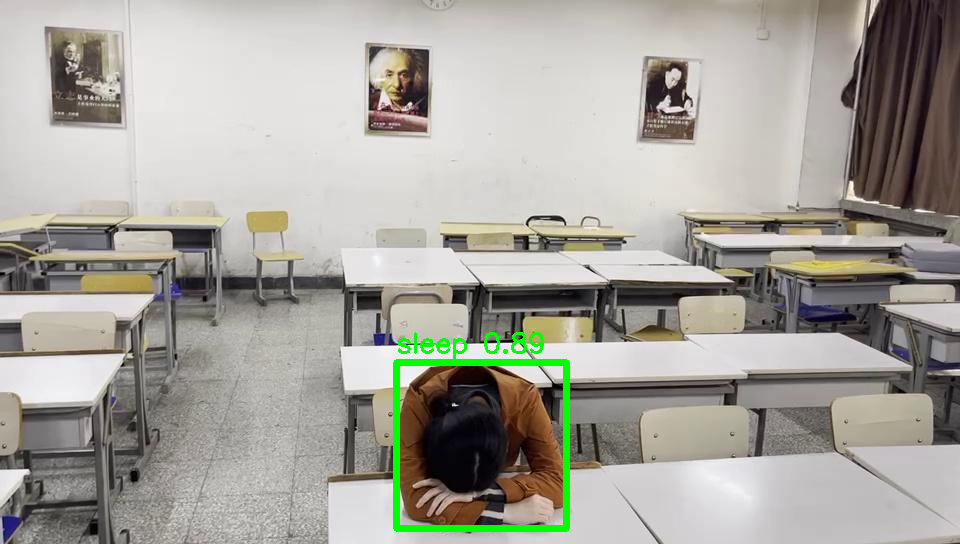

Detected behaviors/emotions:
 - sleep (Confidence: 0.89)


In [ ]:

# Step 2: Import Libraries
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import os

# Step 4: Load the Trained Model
# Replace with the actual path to your trained weights file
model_path = "/content/runs/detect/classroom_behavior_detection_s/weights/best.pt"
model = YOLO(model_path)
print("Model loaded successfully.")

# Step 5: Make Predictions on an Image
# Replace with the path to your test image
image_path = "/content/student-classroom-activity-2/test/images/210_jpg.rf.3cf66616066549303c4a663895d3a167.jpg"  # Upload an image to Colab and update this path

# Run inference
results = model.predict(
    source=image_path,
    conf=0.25,  # Confidence threshold (adjust as needed)
    iou=0.45,   # IoU threshold for NMS (adjust as needed)
    save=True # Save detection results as a text file
)

# Step 6: Display Results
# Load the image with OpenCV to show it
img = cv2.imread(image_path)
for result in results:
    boxes = result.boxes  # Get bounding boxes
    for box in boxes:
        # Extract coordinates, confidence, and class
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        conf = box.conf[0]  # Confidence score
        cls = int(box.cls[0])  # Class index
        label = f"{model.names[cls]} {conf:.2f}"  # Class name and confidence

        # Draw bounding box and label on the image
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 5)  # Green box
        cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image in Colab
cv2_imshow(img)

# Print detected behaviors/emotions
print("Detected behaviors/emotions:")
for result in results:
    for box in result.boxes:
        cls = int(box.cls[0])
        conf = box.conf[0]
        print(f" - {model.names[cls]} (Confidence: {conf:.2f})")


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NwOq8YGFjNY57lbPrwBo")
project = rf.workspace("ahsan-h6w1d").project("student-classroom-activity-6bm9m-8ayzb")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to student-classroom-activity-1 in yolov8:: 100%|██████████| 2378/2378 [00:01<00:00, 1564.52it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO
model = YOLO("yolov8s.pt")  # Using the small model for higher accuracy
dataset_location = "/content/student-classroom-activity-1"  # Example path; adjust to your dataset's location
print(f"Dataset location: {dataset_location}")
# Step 6: Train the Model
model.train(
    data=f"{dataset_location}/data.yaml",  # Path to your data.yaml file
    epochs=10,                            # Number of epochs
    imgsz=640,                            # Image size
    batch=16,                             # Batch size (adjust if needed for GPU memory)
    name="classroom_behavior_detection_s", # Name of the training run
    patience=10,                          # Early stopping patience
    device=0                              # Use GPU (0) in Colab
)

# Step 7: Validate the Model
metrics = model.val()
print(f"Validation metrics: {metrics}")

100%|██████████| 21.5M/21.5M [00:00<00:00, 115MB/s]


Dataset location: /content/student-classroom-activity-1
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/student-classroom-activity-1/data.yaml, epochs=10, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=classroom_behavior_detection_s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=Fa

100%|██████████| 755k/755k [00:00<00:00, 26.1MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 159MB/s]


AMP: checks passed ✅


train: Scanning /content/student-classroom-activity-1/train/labels... 948 images, 0 backgrounds, 0 corrupt: 100%|██████████| 948/948 [00:00<00:00, 2210.23it/s]

train: New cache created: /content/student-classroom-activity-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/student-classroom-activity-1/valid/labels... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<00:00, 1177.43it/s]

val: New cache created: /content/student-classroom-activity-1/valid/labels.cache


Plotting labels to runs/detect/classroom_behavior_detection_s/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/classroom_behavior_detection_s
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       3.8G     0.9005      1.793       1.08          5        640: 100%|██████████| 60/60 [00:24<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.74it/s]

                   all        158        293      0.801      0.796      0.897      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.79G     0.8459     0.8068      1.042          6        640: 100%|██████████| 60/60 [00:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.59it/s]

                   all        158        293      0.747      0.458      0.634      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.82G     0.8313     0.6525      1.043          8        640: 100%|██████████| 60/60 [00:20<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        158        293      0.911      0.724      0.828      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.86G     0.8148     0.6485      1.018          6        640: 100%|██████████| 60/60 [00:19<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.75it/s]

                   all        158        293      0.947      0.904      0.963      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       4.9G      0.782     0.5425          1          9        640: 100%|██████████| 60/60 [00:21<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        158        293      0.971      0.936      0.976      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.93G     0.7424     0.4988     0.9888          7        640: 100%|██████████| 60/60 [00:19<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.66it/s]

                   all        158        293      0.977      0.968       0.99      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.97G     0.7004     0.4469     0.9587          8        640: 100%|██████████| 60/60 [00:21<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.79it/s]

                   all        158        293      0.979      0.969      0.988      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         5G      0.665     0.4145     0.9456         10        640: 100%|██████████| 60/60 [00:20<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.92it/s]

                   all        158        293      0.984      0.973      0.992      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      5.04G     0.6351     0.3788     0.9289          6        640: 100%|██████████| 60/60 [00:19<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.67it/s]

                   all        158        293      0.982      0.978      0.993      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      5.08G     0.6048     0.3565     0.9174          8        640: 100%|██████████| 60/60 [00:19<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.88it/s]

                   all        158        293      0.988      0.978      0.994      0.858



10 epochs completed in 0.067 hours.
Optimizer stripped from runs/detect/classroom_behavior_detection_s/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/classroom_behavior_detection_s/weights/best.pt, 22.5MB

Validating runs/detect/classroom_behavior_detection_s/weights/best.pt...
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.00it/s]


                   all        158        293      0.988      0.978      0.994      0.858
                 phone         48         58      0.992          1      0.995      0.903
                 sleep        100        113      0.978          1      0.995      0.834
                 study         75        122      0.993      0.934      0.991      0.838
Speed: 0.3ms preprocess, 4.7ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/classroom_behavior_detection_s
Ultralytics 8.3.104 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/student-classroom-activity-1/valid/labels.cache... 158 images, 0 backgrounds, 0 corrupt: 100%|██████████| 158/158 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.26it/s]


                   all        158        293      0.988      0.978      0.994       0.86
                 phone         48         58      0.992          1      0.995      0.908
                 sleep        100        113      0.978          1      0.995      0.836
                 study         75        122      0.995      0.934      0.991      0.837
Speed: 1.8ms preprocess, 9.7ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/detect/classroom_behavior_detection_s2
Validation metrics: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ed4f759f950>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.0090

# test on images

Model loaded successfully.

0: 416x640 1 sleep, 1 study, 13.7ms
Speed: 2.1ms preprocess, 13.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
Processed image saved to: output.jpg


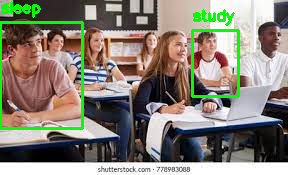

error: OpenCV(4.10.0) /io/opencv/modules/highgui/src/window.cpp:1367: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvWaitKey'


In [ ]:
# Step 1: Import Libraries
from ultralytics import YOLO
import cv2
import os
from google.colab.patches import cv2_imshow # Make sure this import is present

# Step 2: Load the Trained Model
model_path = "/content/best.pt"  # Update this path to your trained weights file
try:
    model = YOLO(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    raise

# Step 3: Specify Image Path
image_path = "/content/images (1).jpg"  # Update with your image path
output_path = "output.jpg"  # Path where the processed image will be saved

# Step 4: Load the Image
image = cv2.imread(image_path)
if image is None:
    print(f"Error: Could not load image at {image_path}")
    image_path = input("Please enter the correct image path: ")
    image = cv2.imread(image_path)
    if image is None:
        print("Still couldn't load the image. Exiting.")
        exit()

# Step 5: Run Inference on the Image
results = model.predict(
    source=image,
    conf=0.25,  # Confidence threshold
    iou=0.45,   # IoU threshold for NMS
)

# Step 6: Process Results and Draw Bounding Boxes
annotated_image = image.copy()  # Create a copy to draw on

for result in results:
    boxes = result.boxes
    for box in boxes:
        # Extract coordinates, confidence, and class
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
        conf = box.conf[0]  # Confidence score
        cls = int(box.cls[0])  # Class index
        label = f"{model.names[cls]}"  # Class name and confidence

        # Draw bounding box and label
        cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
        cv2.putText(annotated_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Step 7: Save the Annotated Image
cv2.imwrite(output_path, annotated_image)
print(f"Processed image saved to: {output_path}")

# Step 8: Display the Image (Optional)
cv2_imshow(annotated_image) # Change cv2.imshow to cv2_imshow
cv2.waitKey(0)  # Wait for any key press to close the window
cv2.destroyAllWindows()

# Step 9: Print Detected Behaviors
print("Detected behaviors in the image:")
if results:
    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])
            conf = box.conf[0]
            print(f" - {model.names[cls]} (Confidence: {conf:.2f})")
else:
    print(" - No objects detected.")

# test on vedio

In [4]:
# Step 1: Import Libraries
from ultralytics import YOLO
import cv2
import os

# Step 2: Load the Trained Model
model_path = "/content/runs/detect/classroom_behavior_detection_s/weights/best.pt"  # Path to your trained weights file
model = YOLO(model_path)
print("Model loaded successfully.")

# Step 3: Specify Video Path
# Replace with the actual path to your MP4 video
video_path = "/content/istockphoto-1462200761-640_adpp_is.mp4"  # Upload your video to Colab and update this path
output_path = "/content/new_vedio.mp4"  # Path where the processed video will be saved

# Step 4: Open the Video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"Could not open video at {video_path}")

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Step 5: Set Up Video Writer
# Define the codec and create VideoWriter object to save the output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

# Step 6: Process Video Frame-by-Frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit loop when video ends

    # Run inference on the current frame
    results = model.predict(
        source=frame,
        conf=0.25,  # Confidence threshold
        iou=0.45,   # IoU threshold for NMS
    )

    # Draw bounding boxes and labels on the frame
    for result in results:
        boxes = result.boxes
        for box in boxes:
            # Extract coordinates, confidence, and class
            x1, y1, x2, y2 = map(int, box.xyxy[0])  # Bounding box coordinates
            conf = box.conf[0]  # Confidence score
            cls = int(box.cls[0])  # Class index
            label = f"{model.names[cls]} {conf:.2f}"  # Class name and confidence

            # Draw bounding box and label
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)  # Green box
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write the annotated frame to the output video
    out.write(frame)

# Step 7: Release Resources
cap.release()
out.release()
print(f"Processed video saved to: {output_path}")

# Step 8: Print Detected Behaviors (Optional)
# Since we’re processing a video, this prints detections from the last frame only
print("Detected behaviors in the last frame:")
if results:  # Check if results exist from the last iteration
    for result in results:
        for box in result.boxes:
            cls = int(box.cls[0])
            conf = box.conf[0]
            print(f" - {model.names[cls]} (Confidence: {conf:.2f})")

Model loaded successfully.

0: 384x640 2 readings, 44.0ms
Speed: 2.5ms preprocess, 44.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 2.8ms preprocess, 10.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 2.4ms preprocess, 10.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 0.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.5ms
Speed: 1.7m